In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

* Building the model


* Displaying the model summary


* Examining the weight matrix variation over training

In [4]:
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [19]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
    return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
    plt.figure(figsize=(10,8))

    for n in range(3):
        delta_1 = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1, 3, n+1)
        plt.imshow(delta_1)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

In [6]:
# Retrieve the weights and biases

# W0_layers = [e.weights[0].numpy() for e in model.layers]
# b0_layers = [e.bias.numpy() for e in model.layers]

In [14]:
W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [15]:
# Constructing a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [16]:
# Compiling and fitting the model

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False)

In [17]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.19807729
Layer 1: bias variation:  0.12587641
Layer 2: bias variation:  0.19089815


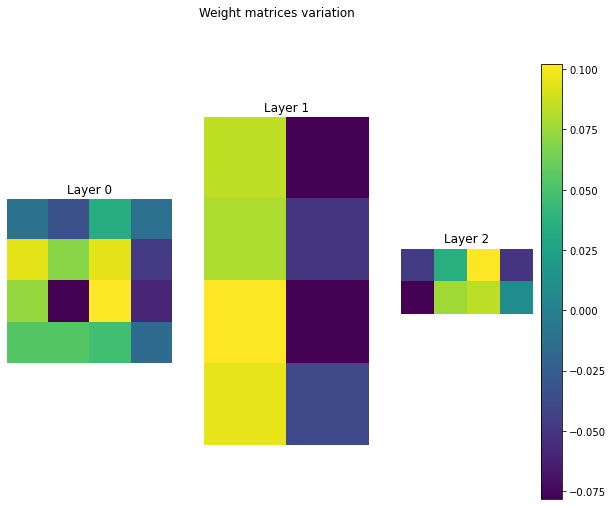

In [11]:
# Plotting the variation

plt.figure(figsize=(10,8))

for n in range(3):
    delta_1 = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(delta_1)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

Layer 0: bias variation:  0.031671125
Layer 1: bias variation:  0.025125809
Layer 2: bias variation:  0.061733052


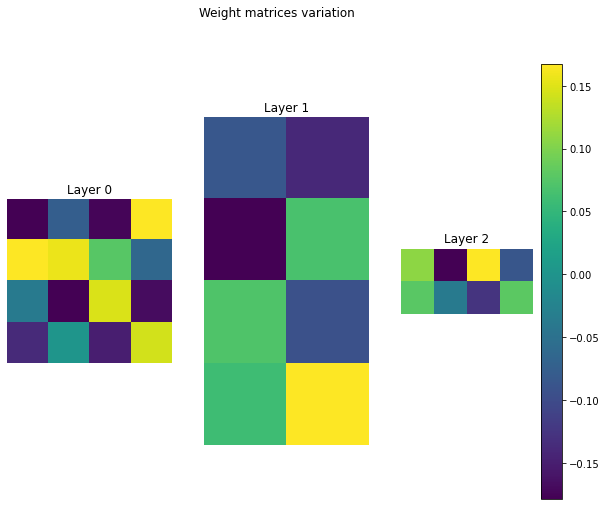

In [20]:
plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

### Freezing layers at build time

In [21]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [22]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [23]:
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [24]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [25]:
print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [26]:
# Retrieve the weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [27]:
# Compiling the model

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False)

In [28]:
# Getting the weights and biases after training

W1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.046756327
Layer 2: bias variation:  0.05686988


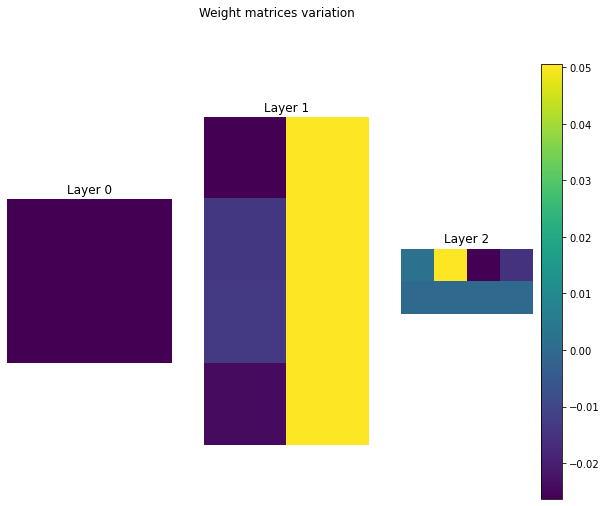

In [29]:
# Can be seen that the first layer was frozen

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)